In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
from tensorflow.keras.optimizers import RMSprop, Adam

## Dataset calling

In [3]:
image_path="../input/plant-disease-dataset/train/train"

In [4]:
train_path="../input/plant-disease-dataset/train/train"
valid_path="../input/plant-disease-dataset/valid/valid/"
test_path="../input/plant-disease-dataset/test/test"

## Data Preprocessing

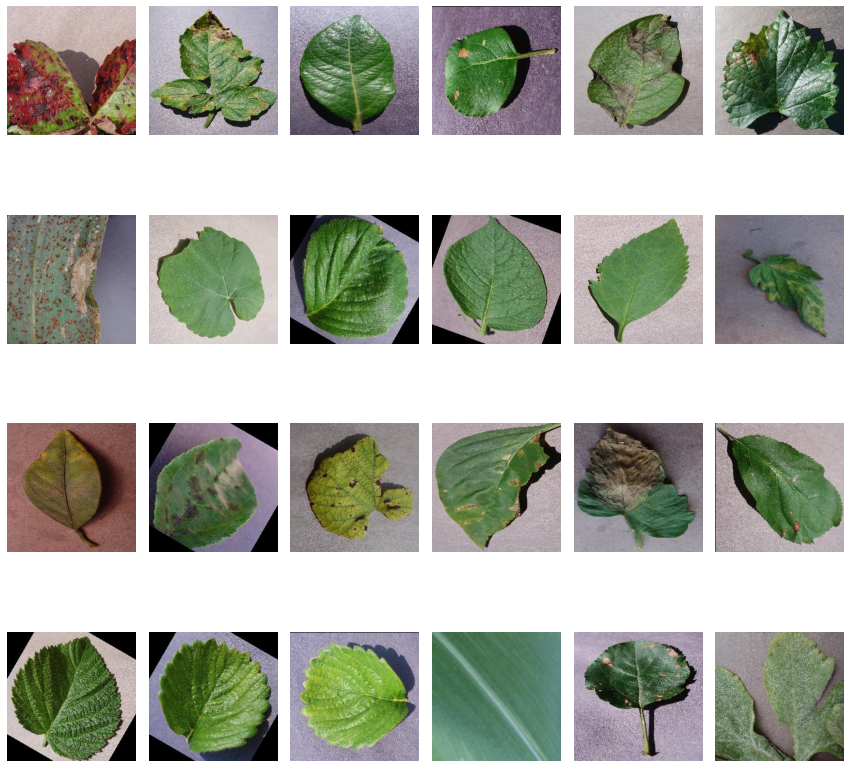

In [5]:


plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(24):
    random_folder=np.random.randint(0,len(os.listdir(image_path)))
    random_folder_path=os.path.join(image_path,os.listdir(image_path)[random_folder])
    random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
    random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])
    
    image=cv2.imread(random_image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #size=image.shape()
    #print(size)
    plt.subplot(4,6,i+1)
    plt.imshow(image)
    plt.axis("off")
plt.show()

number_class

In [6]:
class_names = os.listdir(image_path)
print(class_names)

['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Invalid_Image', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf

In [7]:
print("Number of classes : {}".format(len(class_names)))

Number of classes : 39


Number of images in each class

In [8]:
numberof_images={}
for class_name in class_names:
    numberof_images[class_name]=len(os.listdir(image_path+"/"+class_name))
images_each_class=pd.DataFrame(numberof_images.values(),index=numberof_images.keys(),columns=["Number of images"])
images_each_class


,Number of images
Tomato___Late_blight,1851
Tomato___healthy,1926
Grape___healthy,1692
Orange___Haunglongbing_(Citrus_greening),2010
Soybean___healthy,2022
Squash___Powdery_mildew,1736
Invalid_Image,436
Potato___healthy,1824
Corn_(maize)___Northern_Leaf_Blight,1908
Tomato___Early_blight,1920


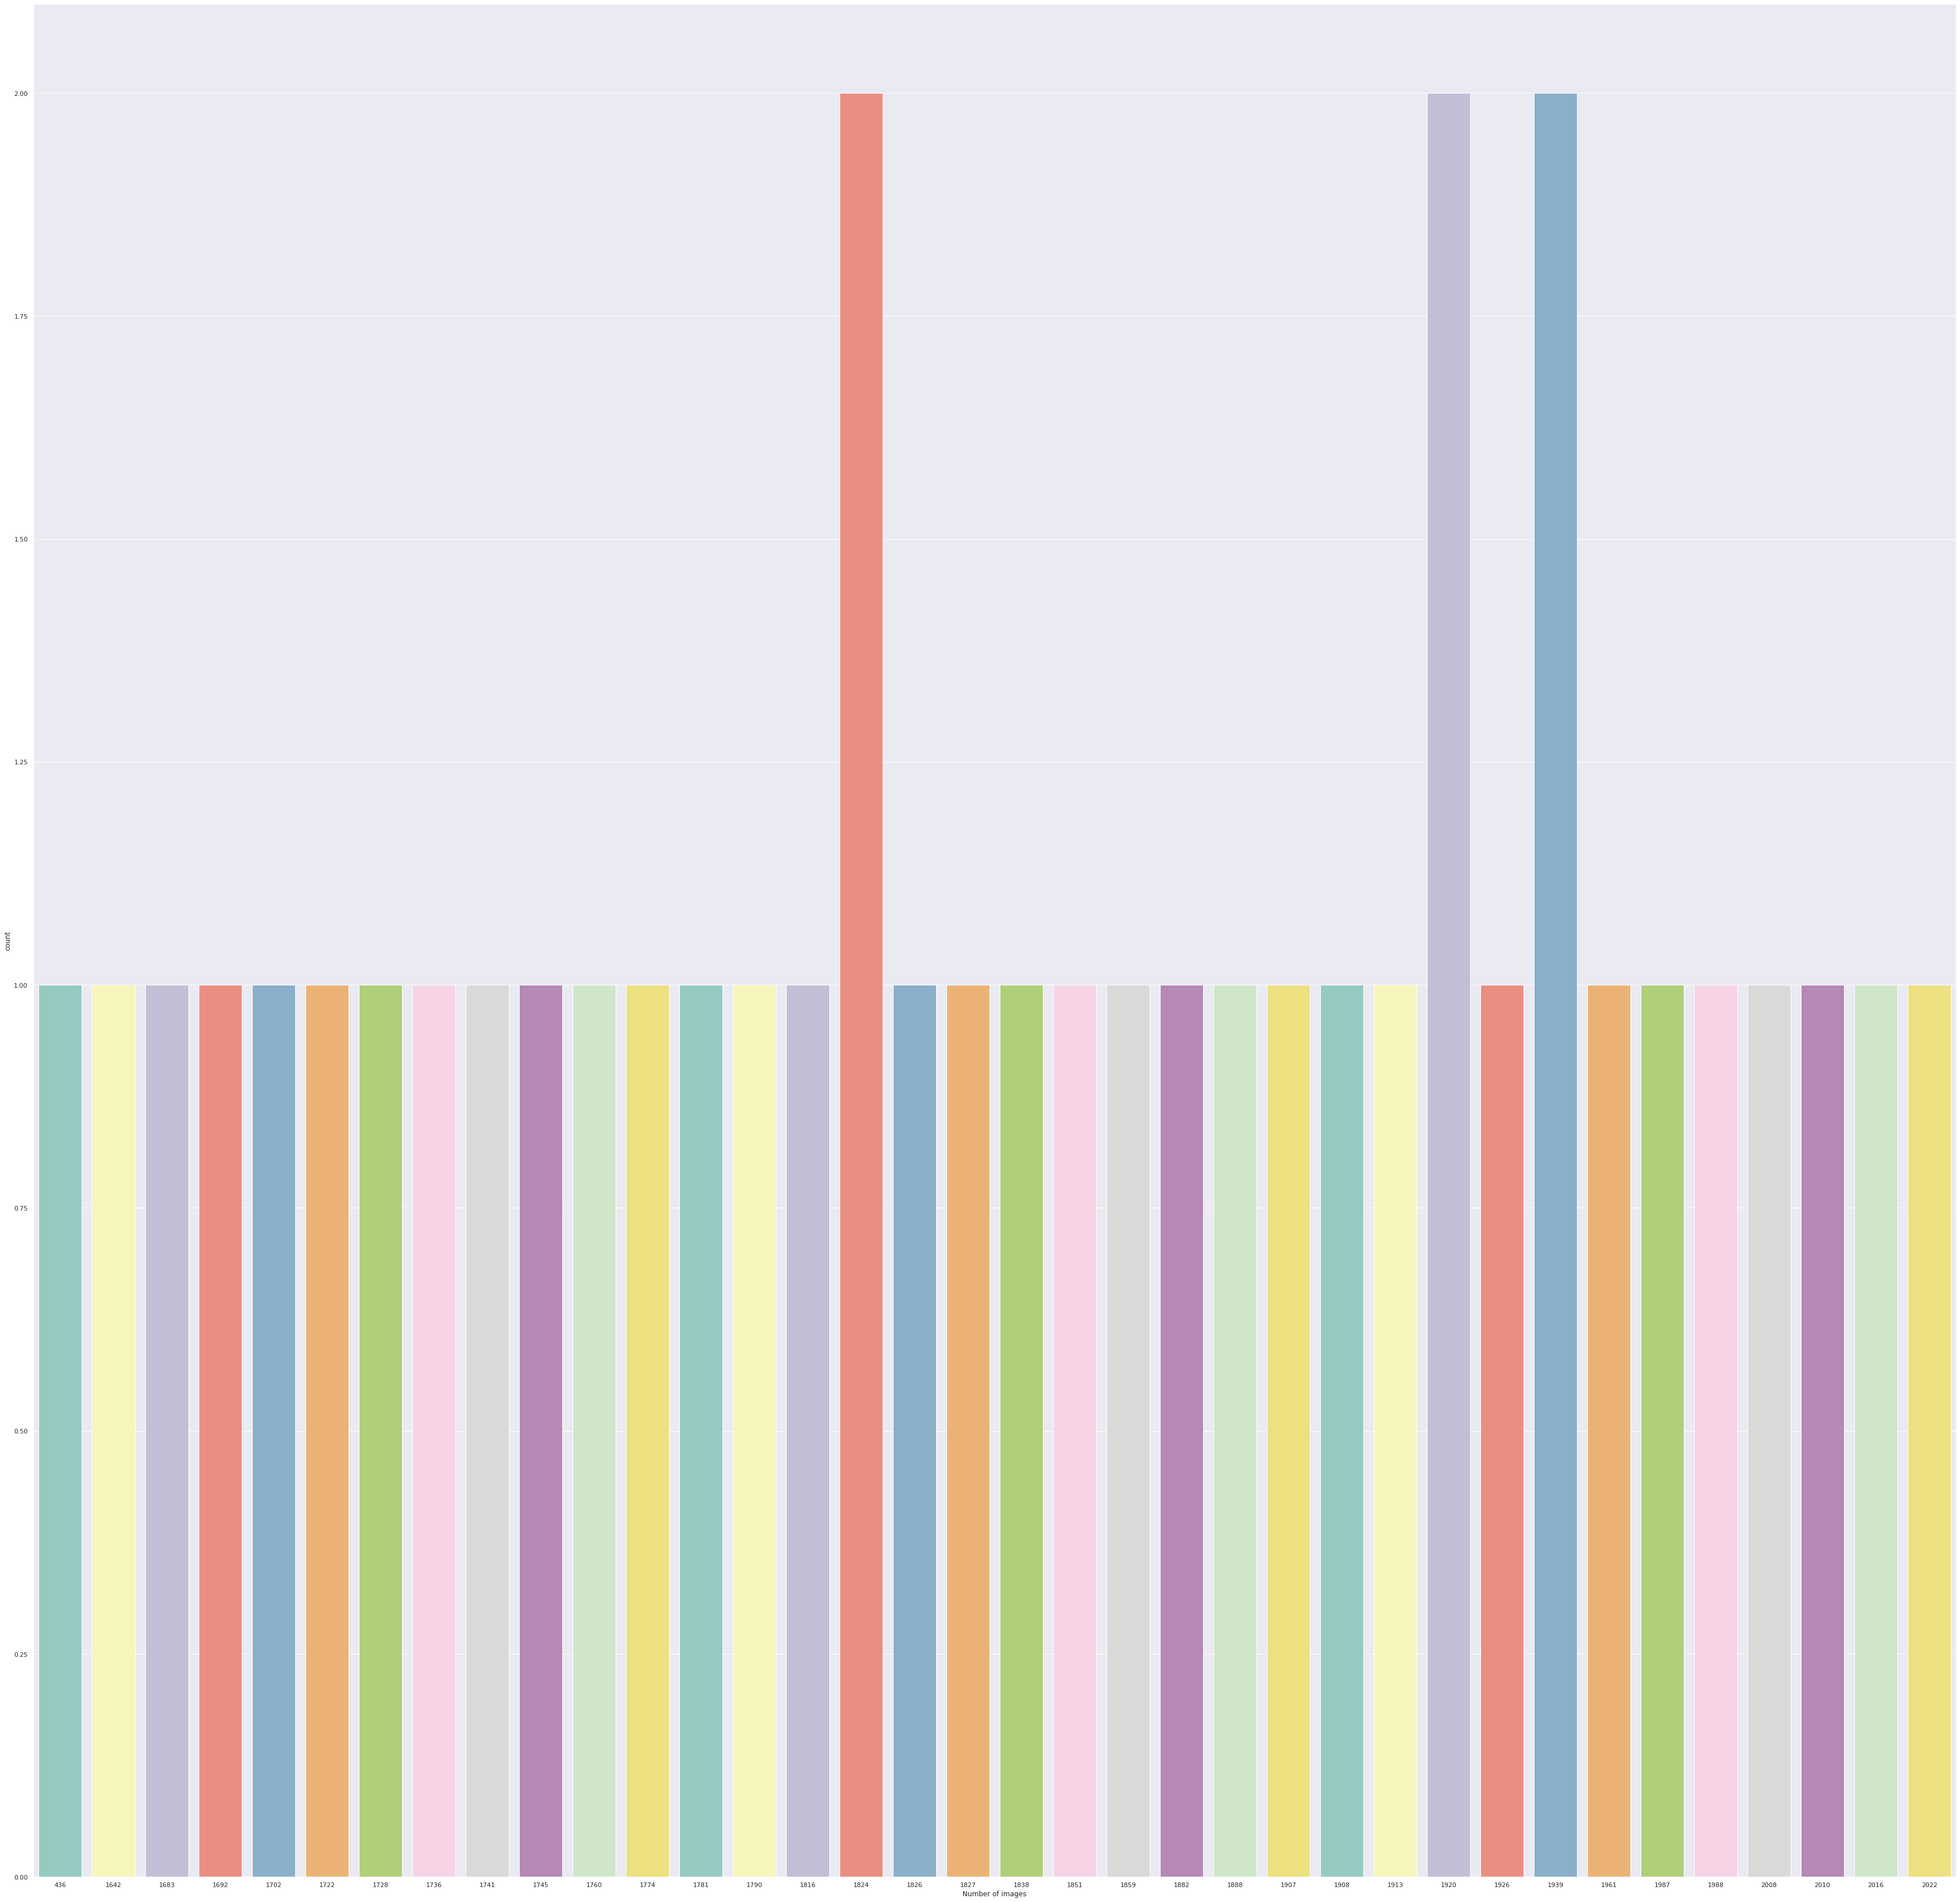

In [9]:
sns.set(rc={'figure.figsize':(60,60)})
ax = sns.countplot(x="Number of images", data=images_each_class,palette="Set3")

In [10]:
batch_size=20

train_data,valid_data and test_data Generator

In [11]:
traindata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
                                                                    shear_range=0.2, horizontal_flip=True)

validdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [12]:
train_data_generator=traindata_generator.flow_from_directory(train_path,batch_size=batch_size,class_mode="categorical",
                                                           target_size=(224,224),color_mode="rgb",shuffle=True )

Found 70731 images belonging to 39 classes.


In [13]:
valid_data_generator=validdata_generator.flow_from_directory(valid_path,batch_size=batch_size,class_mode="categorical",
                                                           target_size=(224,224),color_mode="rgb",shuffle=True )

Found 17756 images belonging to 39 classes.


In [14]:
test_data_generator=testdata_generator.flow_from_directory(test_path,batch_size=batch_size,class_mode="categorical",
                                                           target_size=(224,224),color_mode="rgb",shuffle=False )

Found 0 images belonging to 0 classes.


In [15]:
class_dict = train_data_generator.class_indices
class_list = list(class_dict.keys())
print(class_list)
print(class_dict)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Invalid_Image', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'T

In [16]:
class_dict = valid_data_generator.class_indices
class_list = list(class_dict.keys())
class_list

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Invalid_Image',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_

In [17]:
class_dict = test_data_generator.class_indices
class_list = list(class_dict.keys())
class_list

[]

In [18]:
train_number=train_data_generator.samples
valid_number=valid_data_generator.samples
print(train_number)
print(valid_number)

70731
17756


In [19]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import add
from keras.regularizers import l2
from keras import backend as K

## Resnet Architechture

In [20]:
class ResNet:
  @staticmethod
  def residual_module(data, K, stride, chanDim, red=False,reg=0.0001, bnEps=2e-5, bnMom=0.9):
    shortcut = data
    bn1 = BatchNormalization(axis=chanDim, epsilon=bnEps, momentum=bnMom)(data)
    act1 = Activation("relu")(bn1)
    conv1 = Conv2D(int(K * 0.25), (1, 1), use_bias=False,kernel_regularizer=l2(reg))(act1)
   
    bn2 = BatchNormalization(axis=chanDim, epsilon=bnEps, momentum=bnMom)(conv1)
    act2 = Activation("relu")(bn2)
    conv2 = Conv2D(int(K * 0.25), (3, 3), strides=stride, padding="same", use_bias=False,kernel_regularizer=l2(reg))(act2)
    
    bn3 = BatchNormalization(axis=chanDim, epsilon=bnEps,momentum=bnMom)(conv2)
    act3 = Activation("relu")(bn3)
    conv3 = Conv2D(K, (1, 1), use_bias=False, kernel_regularizer=l2(reg))(act3)

    if red:
      shortcut = Conv2D(K, (1, 1), strides=stride, use_bias=False,kernel_regularizer=l2(reg))(act1)
    x = add([conv3, shortcut])
    return x

  @staticmethod
  def build(width, height, depth, classes, stages, filters,reg=0.0001, bnEps=2e-5, bnMom=0.9):  
    inputShape = (height, width, depth)
    chanDim = -1
    if K.image_data_format() == "channels_first":
      inputShape = (depth, height, width)
      chanDim = 1 

    inputs = Input(shape=inputShape)
    x = BatchNormalization(axis=chanDim, epsilon=bnEps,momentum=bnMom)(inputs)
    x = Conv2D(filters[0], (5, 5), use_bias=False,padding="same", kernel_regularizer=l2(reg))(x)
    x = BatchNormalization(axis=chanDim, epsilon=bnEps,momentum=bnMom)(x)
    x = Activation("relu")(x)
    x = ZeroPadding2D((1, 1))(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    for i in range(0, len(stages)):
      stride = (1, 1) if i == 0 else (2, 2)
      x = ResNet.residual_module(x, filters[i + 1], stride, chanDim, red=True, bnEps=bnEps, bnMom=bnMom)
      for j in range(0, stages[i] - 1):
        x = ResNet.residual_module(x, filters[i + 1],(1, 1), chanDim, bnEps=bnEps, bnMom=bnMom)

    x = BatchNormalization(axis=chanDim, epsilon=bnEps,momentum=bnMom)(x)
    x = Activation("relu")(x)
    x = AveragePooling2D((8, 8))(x)
    x = Flatten()(x)
    x = Dense(classes, kernel_regularizer=l2(reg))(x)
    x = Activation("softmax")(x)
    
    model = Model(inputs, x, name="resnet")
    
    return model

In [21]:
resnet = ResNet.build(224,224,3,39,[3,4,6],[64,128,256,512])

2022-10-19 03:53:43.119020: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 03:53:43.219711: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 03:53:43.220518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 03:53:43.222239: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [22]:
resnet.summary()

Model: "resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 224, 224, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 64) 4800        batch_normalization[0][0]        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 224, 224, 64) 256         conv2d[0][0]                     
_____________________________________________________________________________________________

## WANDB training report generator

In [23]:
%pip install -q wandb
import wandb
from wandb.keras import WandbCallback
wandb.login()

Note: you may need to restart the kernel to use updated packages.


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [24]:
wandb.init(project="resnet")

wandb: Currently logged in as: thushali. Use `wandb login --relogin` to force relogin


## Training and Saving the model

In [25]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
resnet.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )

#print(tf.keras.utils.plot_model(model))
#hist=resnet.fit(train, validation_data = valid, epochs = 100, batch_size = 32,callbacks=[WandbCallback()])

In [26]:
history= resnet.fit(train_data_generator, 
                   steps_per_epoch=train_number//batch_size, 
                   validation_data= valid_data_generator, 
                   validation_steps= valid_number//batch_size,
                   shuffle=True, 
                   verbose=1, 
                   epochs = 5, 
                   batch_size = 20,
                   callbacks=[WandbCallback()]
                   )

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.
2022-10-19 03:54:24.221667: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-19 03:54:24.222179: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-10-19 03:54:24.222362: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-10-19 03:54:24.223094: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so ret

Epoch 1/5


2022-10-19 03:54:34.596589: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


3536/3536 [==============================] - 1412s 395ms/step - loss: 1.4711 - accuracy: 0.6706 - val_loss: 0.8766 - val_accuracy: 0.8262


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/5
3536/3536 [==============================] - 1298s 367ms/step - loss: 0.7423 - accuracy: 0.8484 - val_loss: 0.7675 - val_accuracy: 0.8463
Epoch 3/5
3536/3536 [==============================] - 1306s 369ms/step - loss: 0.5909 - accuracy: 0.8871 - val_loss: 0.5447 - val_accuracy: 0.9051
Epoch 4/5
3536/3536 [==============================] - 1292s 365ms/step - loss: 0.5173 - accuracy: 0.9059 - val_loss: 0.4281 - val_accuracy: 0.9296
Epoch 5/5
3536/3536 [==============================] - 1244s 352ms/step - loss: 0.4629 - accuracy: 0.9175 - val_loss: 0.3840 - val_accuracy: 0.9404


In [27]:
resnet.save("train1.h5")